<a href="https://colab.research.google.com/github/juneilsam/TensorFlowDeveloper/blob/main/Horse_or_Human_WithDropouts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[원작자 깃헙](https://github.com/lmoroney/dlaicourse)

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-12-02 15:41:57--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.240, 172.217.15.80, 142.250.81.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  95.5MB/s    in 1.5s    

2021-12-02 15:41:59 (95.5 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-12-02 15:41:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.188.208, 142.251.33.208, 172.217.12.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.188.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1

In [2]:
import os
import zipfile

In [4]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [5]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [6]:
import tensorflow as tf

In [11]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),

                                    tf.keras.layers.Dense(512, activation='relu'),

                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
from tensorflow.keras.optimizers import RMSprop

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [16]:
validation_datagen = ImageDataGenerator(rescale=1/255)

In [18]:
train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human/',
                                                   target_size=(300, 300),
                                                   batch_size=128,
                                                   class_mode='binary')

Found 1027 images belonging to 2 classes.


In [19]:
validation_generator = validation_datagen.flow_from_directory('/tmp/validation-horse-or-human/',
                                                              target_size=(300, 300),
                                                              batch_size=32,
                                                              class_mode='binary')

Found 256 images belonging to 2 classes.


In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=5, # 시간관계상 100을 5로 변경
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/5
8/8 [==============================] - 99s 12s/step - loss: 0.6575 - accuracy: 0.5895 - val_loss: 0.6785 - val_accuracy: 0.5195
Epoch 2/5
8/8 [==============================] - 99s 14s/step - loss: 0.6333 - accuracy: 0.6618 - val_loss: 0.6719 - val_accuracy: 0.5977
Epoch 3/5
8/8 [==============================] - 99s 12s/step - loss: 0.5991 - accuracy: 0.6774 - val_loss: 0.6632 - val_accuracy: 0.8242
Epoch 4/5
8/8 [==============================] - 99s 12s/step - loss: 0.6490 - accuracy: 0.6696 - val_loss: 0.6699 - val_accuracy: 0.5352
Epoch 5/5
8/8 [==============================] - 99s 14s/step - loss: 0.5703 - accuracy: 0.7019 - val_loss: 0.6678 - val_accuracy: 0.5273


In [22]:
import matplotlib.pyplot as plt

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [24]:
epochs = range(len(acc))

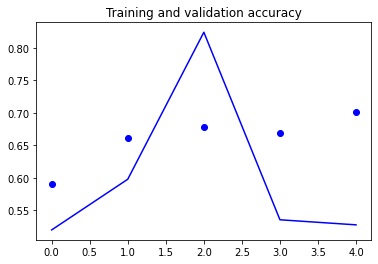

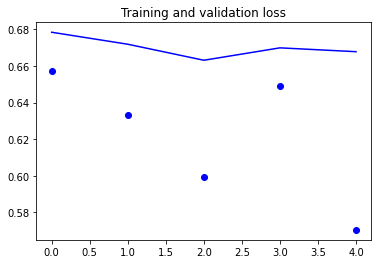

In [25]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.show()